[View in Colaboratory](https://colab.research.google.com/github/PUC-Infovis/syllabus-2018/blob/master/Practico_GeoPandas_IIC3633.ipynb)

# IIC3633 - GeoPandas

**Profesor:** Denis Parra.

** Ayudantes**: Fernando Florenzano,  Hernán Valdivieso y Cristóbal Abarca

Guía creada por Hernán Valdivieso.

Agradecimientos a Eduardo Graells (@carnby) por su codigo en github, sirvió como inspiración para varios ejercicios de datos con pandas.

-----


---
El siguiente _jupyter notebook_ tiene como fin ser una breve guía de cómo utilizar la librería de Python [Geopandas](http://geopandas.org/) para la visualización de datos geo espaciales, y luego aplicar dicho conocimiento para responder una serie de dudas sobre un _dataset_ interesante: respuestas del [Censo 2017](http://www.censo2017.cl/microdatos/).

Para facilitar la instalación de esta librería, este archivo debe ser subido a [Google Colab](https://colab.research.google.com/) para poder ejecutarlo en los servidores de Google, los cuales  disponen de todos los recursos necesarios para ejecutar los códigos que implementarás.


Este  _jupyter notebook_ se divide en 2 partes:

- Introducción al uso de archivos [_shapefile_](https://es.wikipedia.org/wiki/Shapefile) para la visualización de mapas.
- Edición de los mapas para la visualización de datos de interes.




# Instalación
En esta ocasión, Google Colab no dispone de algunas librerías necesarias para este práctico, por lo tanto es necesario instalarlas. La siguiente casilla de código se encarga de instalar 2 librerías que se requieren en este práctico.

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-wmh6o7zp
    100% |████████████████████████████████| 1.5MB 10.0MB/s 
    100% |████████████████████████████████| 15.8MB 2.6MB/s 
    100% |████████████████████████████████| 4.4MB 8.4MB/s 
    100% |████████████████████████████████| 71kB 24.2MB/s 
  Running setup.py bdist_wheel for geopandas ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-vadwxf6r/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | /

# _Shapefile_
El formato ESRI Shapefile (SHP) es un formato de archivo informático propietario de datos espaciales y la librería GeoPandas nos permite leer estos datos.  Primero es necesario bajar los _shapefile_. Para esto, la siguiente casilla se encarga de bajar un .zip desde Dropbox que contiene el _Dataset_ del práctico anterior y 2 _zip_ más con los _shapefile_ de las [comunas de chile](https://www.bcn.cl/siit/mapas_vectoriales) y del [mundo](https://tapiquen-sig.jimdo.com/descargas-gratuitas/mundo/).

In [2]:
!wget -N https://www.dropbox.com/s/k1abr4wa3ufryc6/Diplomado%20Geopandas.zip
!unzip -o "Diplomado Geopandas.zip"
!unzip -o Paises_Mundo.zip
!unzip -o division_comunal.zip


Redirecting output to ‘wget-log’.
Archive:  Diplomado Geopandas.zip
  inflating: Paises_Mundo.zip        
  inflating: DatasetCenso.csv        
  inflating: division_comunal.zip    
Archive:  Paises_Mundo.zip
  inflating: Paises_Mundo.sbx        
  inflating: Paises_Mundo.shp        
  inflating: Paises_Mundo.shp.xml    
  inflating: Paises_Mundo.shx        
  inflating: Paises_Mundo_LEEME.txt  
  inflating: Paises_Mundo.dbf        
  inflating: Paises_Mundo.prj        
  inflating: Paises_Mundo.sbn        
Archive:  division_comunal.zip
  inflating: Disclaimer.txt          
  inflating: division_comunal.dbf    
  inflating: division_comunal.prj    
  inflating: division_comunal.sbn    
  inflating: division_comunal.sbx    
  inflating: division_comunal.shp    
  inflating: division_comunal.shp.xml  
  inflating: division_comunal.shx    


De los archivos descargados, los que utilizaremos son:

-  **DatasetCenso.csv**: _dataset_ del práctico anterior.
- **division_comunal.shp**: _shapefile_ con las divisiones de las comunas de chile.
- **Paises_Mundo.shp**: _shapefile_ con las divisiones de los paises del mundo.

# Abrir _shapefile_ con Geopandas
Lo primero que haremos será utilizar la librería GeoPandas para abrir y visualizar el  _shapefile_ con las divisiones de los paises del mundo. Luego filtraremos dicho archivo para visualizar una parte específica del mundo.

In [3]:
import geopandas
import matplotlib.pyplot as plt

mundo = geopandas.read_file("Paises_Mundo.shp")
mundo.head(5)

,PAÍS,geometry
0,Aruba (Paises Bajos),POLYGON ((-69.88223266601562 12.41110992431641...
1,Antigua y Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,Afganistán,"POLYGON ((61.27655792236328 35.60724639892578,..."
3,Argelia,POLYGON ((-5.152134895324707 30.18046951293945...
4,Azerbaiyán,(POLYGON ((46.54037475585938 38.87558746337891...


## Explicación:

- **Línea 1**:

```python
mundo = geopandas.read_file("Paises_Mundo.shp")
```

Utilizamos la función [`read_file`](http://geopandas.readthedocs.io/en/latest/reference/geopandas.read_file.html) para abrir el archivo _Paises_\__Mundo.shp_. Esto retorna un `GeoDataFrame` al cual se le puede aplicar los mismos métodos de un `DataFrame` que fueron vistos en el práctico anterior.

- **Línea 2**:

```python
mundo.head(5)
```
Usamos el método `head` para observar las primeras 5 filas. Como se puede ver en el `GeoDataFrame`, cada fila es el nombre de un país y un `POLYGON`, este último es aquel que contiene toda la información necesaria para dibujar al país al momento de visualizar.


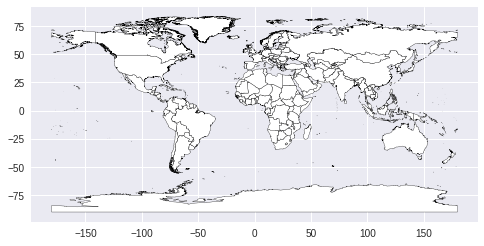

In [4]:
mundo.plot(color='white', edgecolor='black')
plt.show()

## Explicación:

- **Línea 1**:

```python
mundo.plot(color='white', edgecolor='black')
```

En esta línea, indicamos que queremos visualizar el _GeoDataFrame_ y como argumentos adicionales, le indicamos que el calor de cada figura será Blanco y los bordes serán Negros.

- **Línea 2**:

```python
plt.show()
```
Finalmente, le pedimos a Matplotlib que haga ``show`` del mapa anteriormente generado con el método `plot`. Este comando siempre debe ir al final para indicar que se debe mostrar en pantalla todo lo que anteriormenete fue declarado, sean mapas, gráficos, puntos o líneas en el mapa, etc.


# Visualizar una parte del mundo
Ahora solo queremos ver los siguientes paises: Chile, Peru, Argentina y Bolivia.

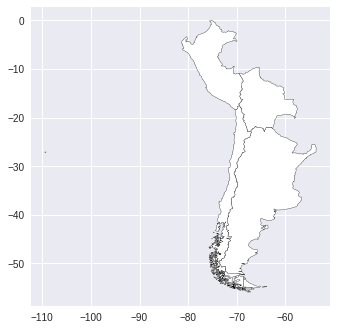

In [5]:
mundo[mundo["PAÍS"].isin(["Chile", "Perú", "Argentina", "Bolivia"])].plot(color='white', edgecolor='black')
plt.show()

## Explicación
Como se vió en el práctico anterior, existe el método `isin` para filtrar todas las filas cuyo valor esté dentro de la lista. En este caso, aplicamos dicho método para verificar que solo tengamos las figuras de los paises solicitados y luego hacemos `plot` como en el ejemplo anterior.

# Actividad 1
Abra el _shapefile_ con las divisiones de las comunas de chile y visualice solo la Región de Los Lagos. Para filtrar use exactamente el nombre **"Región de Los Lagos"**

# Visualizar con GeoPandas

Ahora utilizaremos Pandas y GeoPandas para lograr visualizar algún dato interesante en el mapa. En particular, queremos observar la descendencia total de inmigrantes en Chile por cada país de origen.

In [0]:
import pandas as pd

censo = pd.read_csv("DatasetCenso.csv", sep=";")
mundo = geopandas.read_file("Paises_Mundo.shp")

paises_descendencia = censo[["pais", "descendencia"]].groupby("pais").sum().descendencia.to_dict()

def buscar(fila):
    pais = fila["PAÍS"]
    if pais in paises_descendencia:
        return paises_descendencia[pais]
    return 0

mundo["cantidad"] = mundo.apply(buscar, axis=1)

## Explicación: 

- **Línea 1**:

```python
censo = pd.read_csv("DatasetCenso.csv", sep=";")
```
Función para cargar el _dataset_ y obtener el DataFrame con la información.

- **Línea 2**:

```python
mundo = geopandas.read_file("Paises_Mundo.shp")
```
Función para cargar el _shapefile_ y obtener el GeoDataFrame con la información

- **Línea 3**:

```python
paises_descendencia = censo[["pais", "descendencia"]].groupby("pais").sum().descendencia.to_dict()
```
Necesitamos obtener para cada país, la cantidad total de descendencia de sus inmigrantes. En esta línea se hacen las siguientes acciones:

- `censo[["pais", "descendencia"]]`: con esto seleccionamos solo las columnas _pais_ y _descendencia_.
- `(...).groupby("pais").sum()`: luego de seleccionar las columnas, agrupamos por país y aplicamos `sum` a la _descendencia_. De este modo nos quedamos con un ``DataFrame`` donde el índice es el nombre del país y la columna _descendencia_ indica la cantidad total de hijos para inmigrantes de dicho país.
- `(...).descendencia.to_dict()`: con esta última parte del código, obtenemos la columna _descendencia_ y la convertimos en un [diccionario](https://docs.python.org/3.7/tutorial/datastructures.html#dictionaries) donde la llave será el nombre del país y el valor será la cantidad de inmigrantes. De este modo, se puede acceder de forma rápida a la cantidad total de inmigrantes de un país con solo saber su nombre.

- **Línea 4 a 12**:

```python
def buscar(fila):
    pais = fila["PAÍS"]
    if pais in paises_descendencia:
        return paises_descendencia[pais]
    return 0
```
Función la cual recibe una fila del GeoDataFrame, selecciona la columna "PAÍS" y la busca en el diccionario llamada _paises_\__descendencia_. En caso de que dicho país esté en el diccionario, se retorna el valor que guarda dicho diccionario, en otro caso retorna 0.


- **Línea 14**:

```python
mundo["cantidad"] = mundo.apply(buscar, axis=1)
```
El método [`apply`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) permite aplicar una función a cada fila o columna del ``DataFrame`` (o ``GeoDataFrame``). Por defecto, este método aplica la función a cada columna, pero con `axis=1` hace que se aplique la función a cada fila. En este ejemplo, para cada fila, buscamos el país en el diccionario y retornamos la cantidad total de descendencia de dicho país. Toda esta información es guardada en una nueva columna llamada _cantidad_.


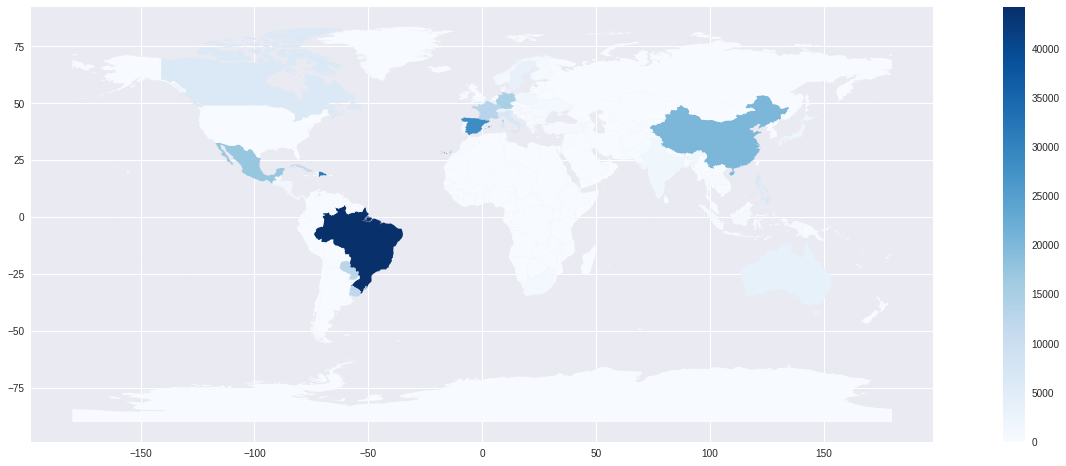

In [0]:
f, ax = plt.subplots(1, figsize=(25, 8))
ax = mundo.plot(ax=ax,column="cantidad", cmap='Blues', legend=True, categorical=False)
plt.show()

## Explicación:

Como se puede observar en el mapa, la mayor cantidad de descendeientes de inmigrantes proviene de Brasil.

- **Línea 1**:

```python
f, ax = plt.subplots(1, figsize=(25, 8))

```
[`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) crea una figura y un set de futuros gráficos para visualizar. En este caso le indicamos que la figurá tendrá un tamaño de 25 x 8 pulgadas y solo tendrá 1 gráfico. `f` es el objeto figura y `ax` es el objeto gráfico ([`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)).

- **Línea 3**:

```python
ax = mundo.plot(ax=ax,column="cantidad", cmap='Blues', legend=True, categorical=False)
```

En esta línea estamos solicitando que el ``GeoDataFrame`` llamado `mundo` se visualice con los siguientes parametros:

* **ax**: este parámetro indica sobre que gráfico visualizar el mapa. En caso no indicarlo, se genera uno nuevo, pero como nosotros buscamos visualizarlo dentro del gráfico definido previamente que tiene de tamaño 25 x 8 pulgadas, debemos entregarle dicho parámetro.
* **column**: nombre de una columna del `GeoDataFrame` utilizada para definir el color de cada POLYGON.
* **cmap**:  nombre de la secuencia de colores a utilizar en la visualización. En este [link](https://matplotlib.org/examples/color/colormaps_reference.html) puedes encontrar más secuencias de colores.
* **legend**: booleano que indica si se desea visualizar la legenda de colores en el gráfico. 
* **categorical**: booleano que indica si los datos ingresados en _column_ son categoricos o no. En este caso no lo son y por ello se pone `False`.

De este modo, hacemos que cada figura tome un color distinto según el valor que tenga en la columna _cantidad_.




# Actividad 2

Para la región metropolitana, queremos observar cual es el país de inmigrantes de donde más gente proviene.

Tal como a la variable `mundo` le agregamos una columna llamada _cantidad_. A la variable `santiago` necesitamos que le agreguemos la columna _pais predominante_. El código para visualizar ya está entregado, por lo que solo falta obtener, para cada comuna, el país de inmigrante con mayor cantidad de personas

In [0]:
import pandas as pd

chile = geopandas.read_file("division_comunal.shp")
santiago = chile[chile.NOM_REG == "Región Metropolitana de Santiago"].copy()


# completar y agregar la columna "pais predominante" al DataFrame Santiago

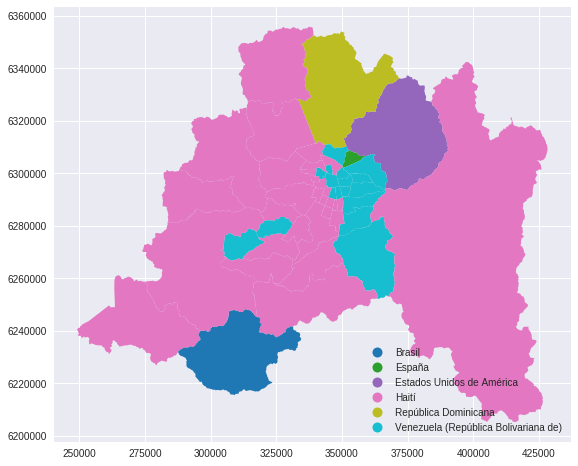

In [0]:
# Código listo para visualizar
f, ax = plt.subplots(1, figsize=(25, 8))
ax = santiago.plot(ax=ax,column="pais predominante", legend=True, categorical=True, legend_kwds = {"loc": "lower right", "fancybox": "True"})
plt.show()